# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Alunas: Ana Julia Pietroski e Bárbara Girardi

O objeto deste estudo é o empreendimento Klabin S.A. da cidade de Correia Pinto (Latitude 27°32'54.16"S, Longitude 50°21'52.71"W). A unidade em questão foi construída em 1969 e é focada em produção de papel para embalagens. 

A unidade de Correia Pinto possui licença ambiental para as atividades sob código "17.11.00 - Fabricação de Celulose" e "17.21.00 - Fabricação de Papel" da CONSEMA 98/2017.

## 1. Planilha dos fatores de emissão para cada processo da Klabin (linhas) e respectivo poluente (colunas)
- Referência para processos e poluentes/emissões de uma indústria de papel: AP-42, Capítulo 10.2 - Chemical Wood Pulping.

Neste capítulo trata sobre a extração da celulose, principal elemento para produção do papel, e os processos para tal, destacando o kraft, que tem grande potencial poluidor e é o principal componente utilizado na unidade da Klabin de Correia Pinto para produção do sackraft.

- Referência para estimativa de emissões: Inventário de Emissões Atmosféricas da Região da Grande Vitória (ano base 2015) do Instituto do Meio Ambiente e Recursos Hídricos (IEMA).

A empresa escolhida como referência é a Vipasa - Vitoria Industria e Comercio de Papeis SA (Brasil), pois esta realiza a mesma atividade que a Klabin (indústria de papel).


#### Segundo dados de monitoramento de emissões atmosféricas presente nas licenças ambientais nº7772/2020 e nº2119/2021 da Klabin, utilizam-se os seguintes equipamentos:
- Forno de cal (Lime kiln, cap 10.2), com consumo médio mensal de 700 toneladas de óleo combustível; 
- Condensador de terebitina (Turpentine condenser, cap 10.2), com produção estimada de 89 toneladas/ano;
- Caldeiras de força (neste caso será estudada apenas a com maior emissão), sendo a Caldeira de Força 4 com consumo médio mensal de 36.000 m³ de biomassa (será considerado que a biomassa em questão são restos de madeira);
- Precipitador eletrostático;

In [21]:
# ABRIR PLANILHA DE FATORES DE EMISSÕES COMPILADAS

#Utilizandos Pandas para abrir a planilha
import pandas as pd
import os

#Coletando o cminho da pasta que estou
cwd = os.getcwd()

#Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE' #pasta onde tenho os fatores de emissão
print(cwd)

#Indicando nome do arquivo
chapterNumber = 11
subChapter = 7
file = 'chp_'+str(chapterNumber)+'_'+str(subChapter)+'.csv'

print(file)

#Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)
#fe = pd.read_csvv(path)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
chp_11_7.csv
                          Source    PM  Lead   SO2   NOX   CO  CO2   VOC  \
0              CRM-Fabric filter  0.12  22.0   2.0  2.00  2.0    5  6.00   
1                   Dryer Cooler  2.30   7.0   NaN  8.00  NaN    8  8.00   
2                         Cooler  0.11   NaN   9.0   NaN  4.0    5  1.00   
3  Firing-natural gas-fired kiln   NaN   NaN  44.0  0.54  3.3  780  0.43   

     HF  Fluorides  
0  9.00       1.00  
1   NaN        NaN  
2   NaN        NaN  
3  0.46       0.56  


2530.0


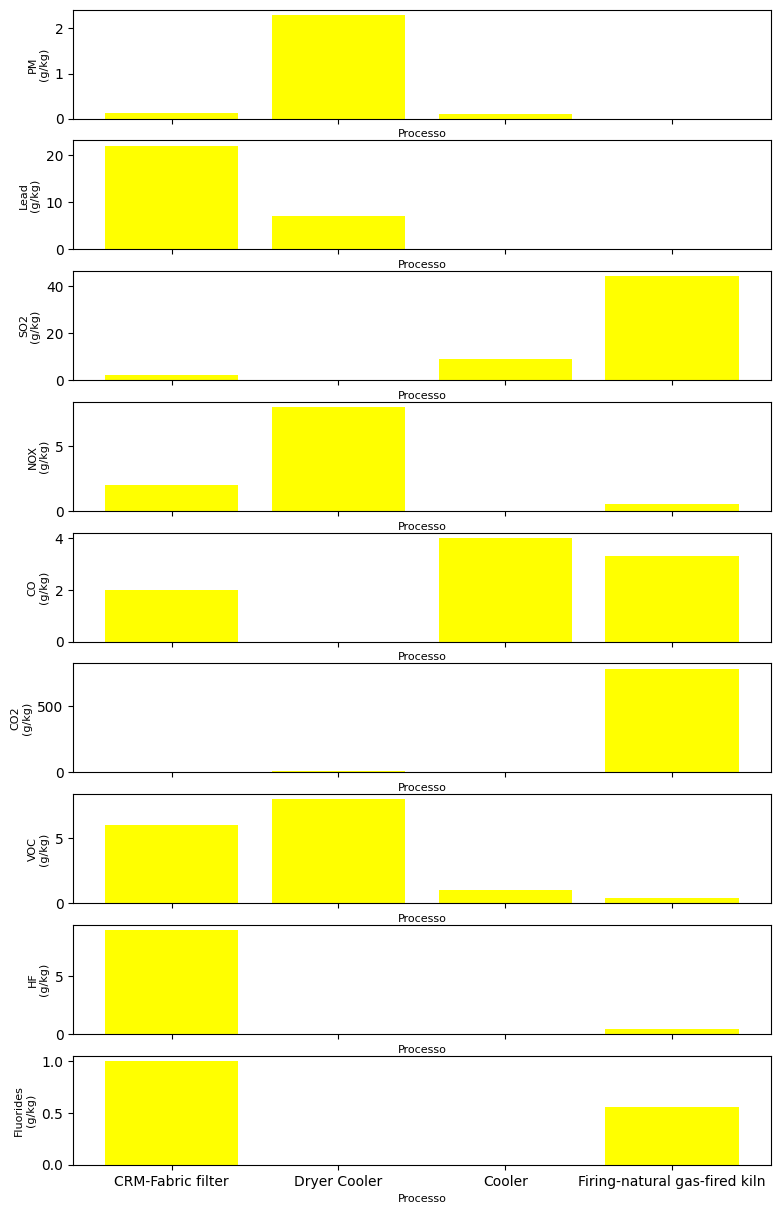

In [29]:
#Plotando os fatores de emissão

import matplotlib.pyplot as plt

atv = 1000 #Considerando uma taxa de atividade
emis = fe['PM']*atv

#Somando dataframe
print(emis.sum())

#Criando a figura com Marplotlib
#Subplots com número de linhas igual ao numero de poluentes
fig,ax = plt.subplots(len(fe.columns)-1,1, sharex = True, figsize=(9,15)) #sharex significa compartilhar o eixo x

#Look para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)): #a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Source'], fe.iloc[:,ii], color = 'yellow') #colocar nessa figura nova
    ax[ii-1].set_xlabel('Processo', fontsize=8) #coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(g/kg)', fontsize=8) #ajeitar unidade g/kg

#Salva a fig na pasta figures
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')


## Criando taxa de atividade aleatória com sazonalidade
Nesta seção criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

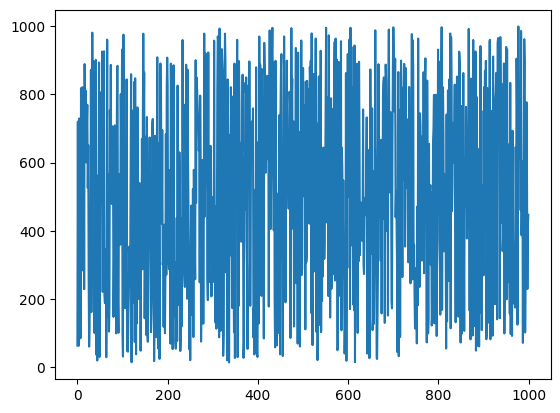

In [32]:
# Criando vetor de valores aleatórios
import numpy as np
atvMax = 1000 #
atvMin = 12
n = 1000 #1000 valores aleatórios
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
#print(atv)

#Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)

In [34]:
# Criar um vetor com as datas

from datetime import datetime, timedelta

dataInicial = datetime(2024,1,1)
dataFinal - datetime(2024,21,31)

NameError: name 'dataFinal' is not defined

In [35]:
#Ajustar meus numeros aleatórios com base no comprimento do vetor de datas

#Extraindo o número de linhas/datas
n = data.shape[0]
#Craindo atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
#print(atv)
#Criando dataframe com datas e valores de atividade aleatórias
import pandas as pd
df = pd.DataFrame()
df['datas'] = data
df['atividade]] = atv

#Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(datas, atv)

SyntaxError: unterminated string literal (detected at line 12) (2334131014.py, line 12)